#**IA Scientific Computing Session 4**#

Ruize Li

rl737

Jesus College Cambridge

In [1]:
# Import the packages we need
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# important common knowledge
millivolts_per_electron = 1000 * 1.602e-19 * 50 / 10e-9

# Load in the Cambridge.da.txt data file
data1 = np.genfromtxt('cem.dat.txt')
data2 = np.genfromtxt('pulses.dat.txt', delimiter='')
data3 = np.genfromtxt('voltages.dat.txt')

# the number of electrons in the pulses
n = data1/millivolts_per_electron

# find the mean and standard diviation
nbar = np.mean(n)
sigman = np.std(n)
print('the mean value of n is:', nbar)
print('the standard diviation of n is:', sigman)

# find the maximum and minimum values of n
print('the largest value of n is:',np.max(n))
print('the smallest value of n is:',np.min(n))

the mean value of n is: 1008232.3052434458
the standard diviation of n is: 195288.22300442625
the largest value of n is: 1480641.822721598
the smallest value of n is: 518554.50686641695


From the code box and the figure above, we know that:

> the mean value of n is: 1008232.3052434458


> the standard diviation of n is: 195288.22300442625


> the largest value of n is: 1480641.822721598


> the smallest value of n is: 518554.50686641695,

in which n is the number of electrons in a pulse.

The resulting distribution looks roughly like a bell.

A = 19.612 +/- 1.928
mu = 991574.877 +/- 22104.833
sigma = 195139.52 +/- 22470.245


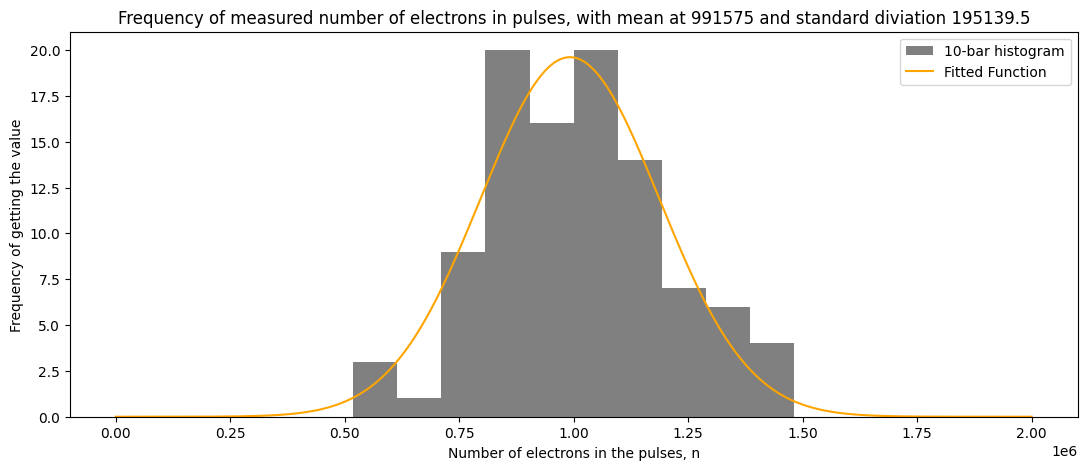

In [2]:
# Use numpy.hist() function to calculate histogram data
hist,bin_edges = np.histogram(n,bins=10)
g = hist
x = (bin_edges[:-1] + bin_edges[1:])/2

# Define non-normalised Gaussian function
def gaussian(x,A,mu,sigma):
  g = A * np.exp(-(x-mu)**2 / (2*sigma**2))
  return g

# Curve fit the histgram data using curve_fit()
popt,pcov = curve_fit(gaussian,x,g,p0=(20,1e+06,2e+05))
perr = np.sqrt(np.diag(pcov))

# Report the values of the fitted parameters and their errors
print('A =', round(popt[0],3), '+/-', round(perr[0],3))
print('mu =', round(popt[1],3), '+/-', round(perr[1],3))
print('sigma =', round(popt[2],3), '+/-', round(perr[2],3))

# prepare for the fitted curve
u = np.arange(0,2e+06,1)
v = round(popt[0],3) * np.exp(-(u-round(popt[1],3))**2 / (2*round(popt[2],3)**2))

# Create histogram of result and superimpose plot
plt.figure(figsize=(13,5))
plt.title('Frequency of measured number of electrons in pulses, with mean at 991575 and standard diviation 195139.5')
plt.hist(n,bins=10,label='10-bar histogram',color='gray')
plt.plot(u,v,'-',label='Fitted Function',color='orange')
plt.xlabel('Number of electrons in the pulses, n')
plt.ylabel('Frequency of getting the value')
plt.legend()
plt.show()

The mu and sigma in this plot can be related to the mean value and standard diviation in the fomer plot, respectively. They are nearly the same, because the fomer data lies between error bars of mu and sigma.

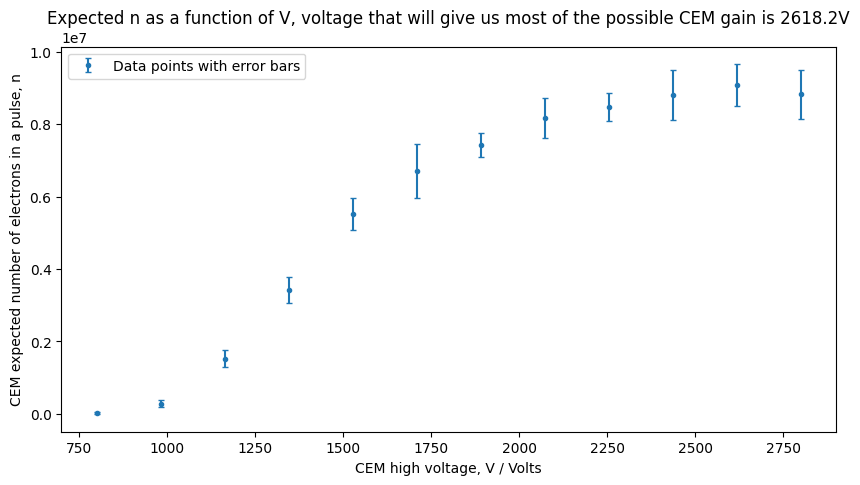

voltage that will give us most of the possible CEM gain is 2618.1818 V
mean for the first row is 0.012503950689999998 and the standard divation is 0.023814271210046287
mean for the second row is 0.225185397 and the standard divation is 0.07132809229262424
mean for the third row is 1.22168305 and the standard divation is 0.19448243825460568
mean for the fourth row is 2.7288631299999997 and the standard divation is 0.28909945257075476
mean for the fifth row is 4.4279819400000004 and the standard divation is 0.3530525692238881
mean for the sixth row is 5.3618408 and the standard divation is 0.5965373369690367
mean for the seventh row is 5.9406859999999995 and the standard divation is 0.26094780075231133
mean for the eighth row is 6.540887789999999 and the standard divation is 0.4391862556714507
mean for the ninth row is 6.782640580000001 and the standard divation is 0.3113101368684767
mean for the tenth row is 7.05717058 and the standard divation is 0.559912628906019
mean for the eleventh

In [3]:
# import data
voltage = np.genfromtxt('voltages.dat.txt')
pulses = np.genfromtxt('pulses.dat.txt',delimiter='')

# convert pulses to number of electrons
m = pulses/millivolts_per_electron

# create arrays for mean and standard diviation of each row
mm = np.array([np.mean(m[0,:]),np.mean(m[1,:]),np.mean(m[2,:]),np.mean(m[3,:]),np.mean(m[4,:]),np.mean(m[5,:]),np.mean(m[6,:]),np.mean(m[7,:]),np.mean(m[8,:]),np.mean(m[9,:]),np.mean(m[10,:]),np.mean(m[11,:])])
sm = np.array([np.std(m[0,:]),np.std(m[1,:]),np.std(m[2,:]),np.std(m[3,:]),np.std(m[4,:]),np.std(m[5,:]),np.std(m[6,:]),np.std(m[7,:]),np.std(m[8,:]),np.std(m[9,:]),np.std(m[10,:]),np.std(m[11,:])])

# plot with error bars
plt.figure(figsize=(10,5))
plt.title('Expected n as a function of V, voltage that will give us most of the possible CEM gain is 2618.2V')
plt.xlabel('CEM high voltage, V / Volts')
plt.ylabel('CEM expected number of electrons in a pulse, n')
plt.errorbar(voltage, mm, sm, fmt='.', capsize=2, label='Data points with error bars')
plt.legend()
plt.show()

# the most effective voltage
print('voltage that will give us most of the possible CEM gain is',voltage[10],'V')

# additional data below
# find the mean and standard diviation of each row
print('mean for the first row is',np.mean(pulses[0,:]),'and the standard divation is', np.std(pulses[0,:]))
print('mean for the second row is',np.mean(pulses[1,:]),'and the standard divation is', np.std(pulses[1,:]))
print('mean for the third row is',np.mean(pulses[2,:]),'and the standard divation is', np.std(pulses[2,:]))
print('mean for the fourth row is',np.mean(pulses[3,:]),'and the standard divation is', np.std(pulses[3,:]))
print('mean for the fifth row is',np.mean(pulses[4,:]),'and the standard divation is', np.std(pulses[4,:]))
print('mean for the sixth row is',np.mean(pulses[5,:]),'and the standard divation is', np.std(pulses[5,:]))
print('mean for the seventh row is',np.mean(pulses[6,:]),'and the standard divation is', np.std(pulses[6,:]))
print('mean for the eighth row is',np.mean(pulses[7,:]),'and the standard divation is', np.std(pulses[7,:]))
print('mean for the ninth row is',np.mean(pulses[8,:]),'and the standard divation is', np.std(pulses[8,:]))
print('mean for the tenth row is',np.mean(pulses[9,:]),'and the standard divation is', np.std(pulses[9,:]))
print('mean for the eleventh row is',np.mean(pulses[10,:]),'and the standard divation is', np.std(pulses[10,:]))
print('mean for the twelves row is',np.mean(pulses[11,:]),'and the standard divation is', np.std(pulses[11,:]))

The most effective value comes from the eleventh row, the voltages is given above.